<a href="https://colab.research.google.com/github/ioippu/Opencv_selftraining/blob/master/Laplacian_pyramid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##圖像金字塔 Image Pyramid
指的是對圖像重複進行平滑和向下採樣(repeated smoothing and subsampling), 每次得到的圖像都是新的圖像寬與高是原來圖像的1 / 2. 這樣不斷重複，得到一組圖像，組合在一起，看起來像金字塔形狀，所以叫圖像金字塔。得到圖像金字塔後，後續可以進行圖像尺度空間分析和多分辨率分析（ scale-space representation and multiresolution analysis）。

**常用的圖像金字塔，有高斯金字塔和拉普拉斯金字塔。**

其中，金字塔由底層向上生成， L0 -> L1 -> … Ln, 叫做圖像的reduce。(downsampling)
而 金字塔由頂向下生成，Ln -> Ln-1 -> … -> L0, 叫做圖像的expand。(upsampling)

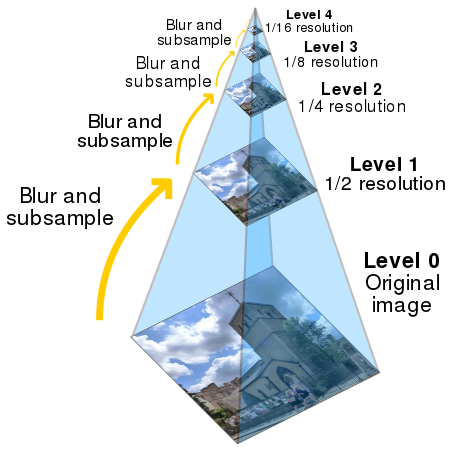

#Laplacian pyramid (拉普拉斯金字塔)

### 拉普拉斯金字塔定義：

每一層的圖像是由：拉普拉斯金字
塔中的第i層，等於「高斯金字塔中的第i層」與「高斯金字塔中的第i+1層的向上採樣結果」之差。

拉普拉斯金字塔是一個"高斯差值金字塔"。
所以拉普拉斯金字塔實際上是保存的是**損失部分信息。**

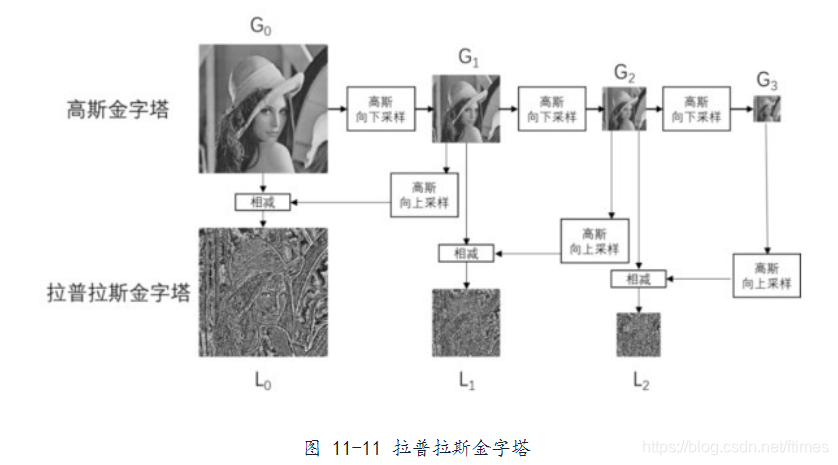

#高斯金字塔

高斯金字塔的Reduce過程分為高斯模糊和偶數行採樣兩步。公式表示如下，

(1024, 1024)
(512, 512)
(256, 256)
(128, 128)
(64, 64)
(32, 32)
(16, 16)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0fd46a1bd0>,
 Text(0.5, 1.0, 'Gus6\n(16, 16)'),
 (-0.5, 15.5, 15.5, -0.5))

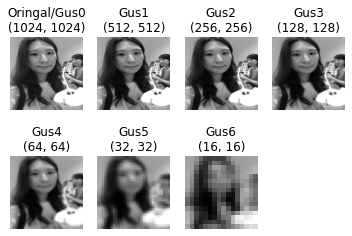

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
import scipy.misc


img = cv2.imread('/content/sample_data/IMG_4030.JPG', cv2.IMREAD_GRAYSCALE )

img = cv2.resize(img, (1024,1024) )

#高斯金字塔
Gus0 = img
Gus1 = cv2.pyrDown(Gus0)
Gus2 = cv2.pyrDown(Gus1)
Gus3 = cv2.pyrDown(Gus2)
Gus4 = cv2.pyrDown(Gus3)
Gus5 = cv2.pyrDown(Gus4)
Gus6 = cv2.pyrDown(Gus5)


plt.figure(0)
print( img.shape )
print( Gus1.shape )
print( Gus2.shape )
print( Gus3.shape )
print( Gus4.shape )
print( Gus5.shape )
print( Gus6.shape )

plt.subplot(241), plt.imshow(img, 'gray'), plt.title('Oringal/Gus0'+ "\n" + str(img.shape)), plt.axis('off')
plt.subplot(242), plt.imshow(Gus1, 'gray'), plt.title('Gus1' + "\n" + str(Gus1.shape)), plt.axis('off')
plt.subplot(243), plt.imshow(Gus2, 'gray'), plt.title('Gus2'+ "\n" + str(Gus2.shape)), plt.axis('off')
plt.subplot(244), plt.imshow(Gus3, 'gray'), plt.title('Gus3'+ "\n" + str(Gus3.shape)), plt.axis('off')
plt.subplot(245), plt.imshow(Gus4, 'gray'), plt.title('Gus4'+ "\n" + str(Gus4.shape)), plt.axis('off')
plt.subplot(246), plt.imshow(Gus5, 'gray'), plt.title('Gus5'+ "\n" + str(Gus5.shape)), plt.axis('off')
plt.subplot(247), plt.imshow(Gus6, 'gray'), plt.title('Gus6'+ "\n" + str(Gus6.shape)), plt.axis('off')



#拉普拉斯金字塔

拉普拉斯金字塔由高斯金字塔形成。沒有專用功能。拉普拉斯金字塔圖像僅像**邊緣圖像**。它的大多數元素為零。它們用於圖像壓縮。拉普拉斯金字塔的層由高斯金字塔的層與高斯金字塔的高層的擴展版本之間的差形成。

image.png

#應用

金字塔的一種應用是圖像融合。例如，在圖像拼接中，您需要將兩個圖像堆疊在一起，但是由於圖像之間的不連續性，可能看起來不太好。在這種情況下，使用金字塔混合圖像可以無縫混合，而不會在圖像中保留大量數據。




(<matplotlib.axes._subplots.AxesSubplot at 0x7f0fd449f750>,
 Text(0.5, 1.0, 'Lap6\n(16, 16)'),
 (-0.5, 15.5, 15.5, -0.5))

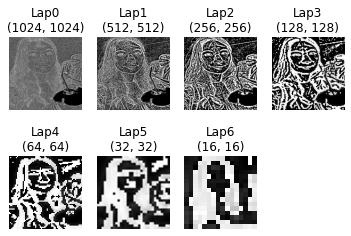

In [42]:
#拉普拉斯金字塔
#lap0 = 原圖 - Gus1(原圖下採樣)再上採樣
#lap1 = Gus1 - Gus2(Gus1下採樣)再上採樣
#lap2 = Gus2 - Gus3(Gus2下採樣)再上採樣
#  :
#  :
#lapn = Gus(n) - Gus(n+1)(Gus(n)下採樣)再上採樣

Gus7 = cv2.pyrDown(Gus6)

Lap0 = Gus0 - cv2.pyrUp(Gus1)
Lap1 = Gus1 - cv2.pyrUp(Gus2)
Lap2 = Gus2 - cv2.pyrUp(Gus3)
Lap3 = Gus3 - cv2.pyrUp(Gus4)
Lap4 = Gus4 - cv2.pyrUp(Gus5)
Lap5 = Gus5 - cv2.pyrUp(Gus6)
Lap6 = Gus6 - cv2.pyrUp(Gus7)

plt.subplot(241), plt.imshow(Lap0, 'gray'), plt.title('Lap0'+ "\n" + str(Lap0.shape)), plt.axis('off')
plt.subplot(242), plt.imshow(Lap1, 'gray'), plt.title('Lap1' + "\n" + str(Lap1.shape)), plt.axis('off')
plt.subplot(243), plt.imshow(Lap2, 'gray'), plt.title('Lap2'+ "\n" + str(Lap2.shape)), plt.axis('off')
plt.subplot(244), plt.imshow(Lap3, 'gray'), plt.title('Lap3'+ "\n" + str(Lap3.shape)), plt.axis('off')
plt.subplot(245), plt.imshow(Lap4, 'gray'), plt.title('Lap4'+ "\n" + str(Lap4.shape)), plt.axis('off')
plt.subplot(246), plt.imshow(Lap5, 'gray'), plt.title('Lap5'+ "\n" + str(Lap5.shape)), plt.axis('off')
plt.subplot(247), plt.imshow(Lap6, 'gray'), plt.title('Lap6'+ "\n" + str(Lap6.shape)), plt.axis('off')

